# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [3]:
#Import dataSet
df = pd.read_csv('/workspaces/MLP_regularizado/data/raw/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [4]:
# Revisaremos tipos de datos, filas y columnas. Fase exploratoria.
df.info('display.max_columns')
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

(3140, 108)

In [5]:
df.nunique()

fips                                                                             3140
TOT_POP                                                                          3074
0-9                                                                              2723
0-9 y/o % of total pop                                                           3136
19-Oct                                                                           2743
10-19 y/o % of total pop                                                         3137
20-29                                                                            2698
20-29 y/o % of total pop                                                         3137
30-39                                                                            2708
30-39 y/o % of total pop                                                         3133
40-49                                                                            2693
40-49 y/o % of total pop                              

In [6]:
#Revisar valores faltantes (en porcentaje) para su posterior exclusión de la data.
df.isnull().mean()*100

fips                                                                             0.0
TOT_POP                                                                          0.0
0-9                                                                              0.0
0-9 y/o % of total pop                                                           0.0
19-Oct                                                                           0.0
10-19 y/o % of total pop                                                         0.0
20-29                                                                            0.0
20-29 y/o % of total pop                                                         0.0
30-39                                                                            0.0
30-39 y/o % of total pop                                                         0.0
40-49                                                                            0.0
40-49 y/o % of total pop                                         

### Revisión de duplicados

In [7]:
#Revisión de filas duplicadas:
df.duplicated().sum()

np.int64(0)

In [8]:
# Revisión de columnas
df.T.duplicated(keep=False).sort_values(ascending = False)

TOT_POP                                                                           True
MEDHHINC_2018                                                                     True
POP_ESTIMATE_2018                                                                 True
Median_Household_Income_2018                                                      True
Total physician assistants (2019)                                                False
COUNTY_NAME                                                                      False
Percent of Population Aged 60+                                                   False
Population Aged 60+                                                              False
Total Population                                                                 False
ICU Beds_x                                                                       False
Total Specialist Physicians (2019)                                               False
Family Medicine/General Practice Primary Ca

### Eliminación de duplicados y variables independientes redundantes

In [9]:
cols_to_drop = [
    'POP_ESTIMATE_2018', 'Median_Household_Income_2018', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
    '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop',
    '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone',
    '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races',
    'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
    'Percent of adults completing some college or associate\'s degree 2014-18', 'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Percent of Population Aged 60+', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI',
    'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI',
    'CI90LBINC_2018', 'CI90UBINC_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'R_birth_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
    'Employed_2018', 'Unemployed_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'county_pop2018_18 and older',
    'Total Population'
]
df_drop = df.drop(columns = cols_to_drop)
df_drop.shape

(3140, 57)

Eliminé muchísimas variables que consideraba redundantes como los porcentajes, IC de cada una de las categorías y alguna que creería que podía estar contenida en otras variables.

In [10]:
df_drop.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,2.2,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,3.6,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,10523,Autauga,Alabama,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,0.1,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,3.6,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,53519,Baldwin,Alabama,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,-2.5,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,5.2,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,6150,Barbour,Alabama,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,-0.3,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,4.0,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,4773,Bibb,Alabama,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,0.3,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,3.5,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,13600,Blount,Alabama,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


In [11]:
df_drop.shape

(3140, 57)

In [12]:
df_drop.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,2.2,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,3.6,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,10523,Autauga,Alabama,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,0.1,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,3.6,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,53519,Baldwin,Alabama,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,-2.5,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,5.2,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,6150,Barbour,Alabama,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,-0.3,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,4.0,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,4773,Bibb,Alabama,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,0.3,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,3.5,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,13600,Blount,Alabama,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


### **Comentario**
He decidido quedarme con state_name_fips y county_name_fips porque son los 'labelencoding' de los nombres de los condados y de los estados. Nos sirve como transformación numérica de las variables categóricas 'COUNTY_NAME' y 'STATE_NAME'.

In [13]:
#Eliminamos columnas categóricas y fips (número identificativo de los condados)
df_cleaned = df_drop.drop(columns = ['fips','COUNTY_NAME', 'STATE_NAME'])
df_cleaned.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,2.2,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,3.6,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,10523,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,0.1,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,3.6,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,53519,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,-2.5,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,5.2,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,6150,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,-0.3,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,4.0,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,4773,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,0.3,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,3.5,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,13600,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


In [14]:
#Guardamos el nuevo dataframe limpio:
df_cleaned.to_csv('/workspaces/MLP_regularizado/data/interim/dataSet_cleaned.csv')

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               3140 non-null   int64  
 1   0-9                                                   3140 non-null   int64  
 2   19-Oct                                                3140 non-null   int64  
 3   20-29                                                 3140 non-null   int64  
 4   30-39                                                 3140 non-null   int64  
 5   40-49                                                 3140 non-null   int64  
 6   50-59                                                 3140 non-null   int64  
 7   60-69                                                 3140 non-null   int64  
 8   70-79                                                 3140

### Métricas descriptivas de las variables restantes

In [16]:
#Hacemos revisión descriptiva de las variables a considerar en el modelo:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,3140.0,104189.412420,333583.395432,88.000000,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05


## **Observaciones**
La variable TOT_POP, no sigue una distribución normal. Será transformada con el log para trabajarlo un poco mejor antes del entrenamiento del modelo.

In [17]:
#Transformación de la variable 'TOT_POP' en log. 
df_cleaned['TOT_POP'] = np.log(df_cleaned['TOT_POP'])

### **Visualización de variables numéricas y distribuciones**

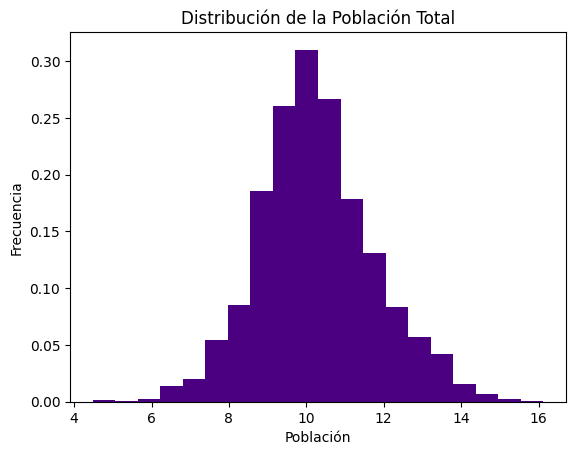

In [18]:
#Visualización gráfica de la distribución poblacional
data = df_cleaned['TOT_POP'] #Existen valores 0 y las escalas son muy elevadas (aplicamos log(x+1)).

#Gráfico de distribución
plt.hist(data, bins=20, color='indigo', density=True)
plt.title('Distribución de la Población Total')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_8524/3191222301.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels_rac, rotation=45)
/tmp/ipykernel_8524/3191222301.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels_study, rotation=45)


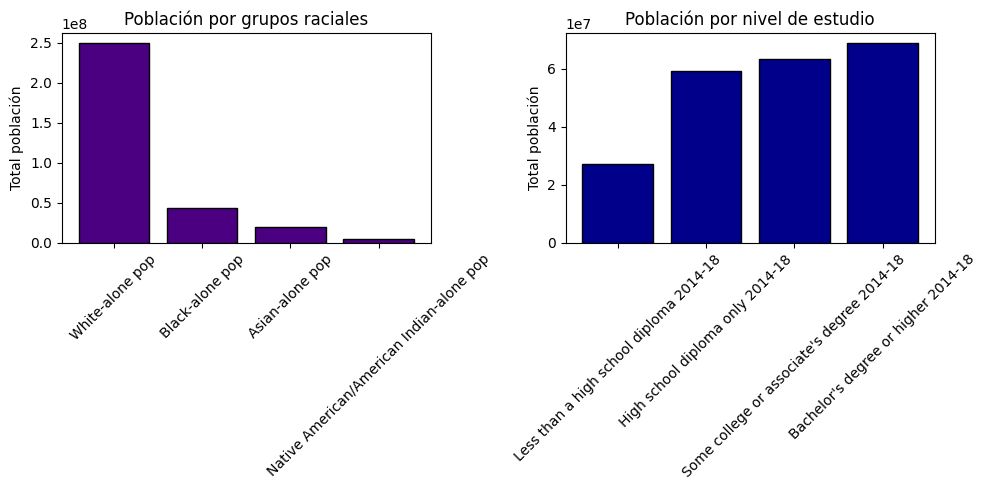

In [19]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

labels_rac = ['White-alone pop', 'Black-alone pop', 'Asian-alone pop', 'Native American/American Indian-alone pop']
values_rac = df_cleaned[labels_rac].sum().values

labels_study = ["Less than a high school diploma 2014-18", "High school diploma only 2014-18", "Some college or associate's degree 2014-18","Bachelor's degree or higher 2014-18"]
values_study = df_cleaned[labels_study].sum().values

axs[0].bar(labels_rac, values_rac, color = 'indigo', edgecolor = 'black')
axs[0].set_title('Población por grupos raciales')
axs[0].set_ylabel('Total población')
axs[0].set_xticklabels(labels_rac, rotation=45)
                       
axs[1].bar(labels_study, values_study, color = 'darkblue', edgecolor = 'black')
axs[1].set_title('Población por nivel de estudio')
axs[1].set_ylabel('Total población')
axs[1].set_xticklabels(labels_study, rotation=45)

plt.tight_layout()
plt.show()

In [20]:
#Creamos una lista con las enfermedades que no queremos tomar en el estudio para desconsiderar en la partición de datos
health_condit_col = ['anycondition_prevalence', 'anycondition_number','Obesity_prevalence', 'Obesity_number','Heart disease_number', 'COPD_prevalence', 'COPD_number', 'diabetes_prevalence', 'diabetes_number', 'CKD_prevalence', 'CKD_number', 'Heart disease_prevalence']

### Partición de Datos para el modelo de Regresión Lineal

In [21]:
#Partición de datos para el modelo:
X = df_cleaned.drop(columns = health_condit_col)
y = df_cleaned['Heart disease_number']

#División del dataSet 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_train.shape

(2512, 42)

In [23]:
X_test.shape

(628, 42)

### **Observaciones Influyentes**

In [24]:
# Ajuste del modelo
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

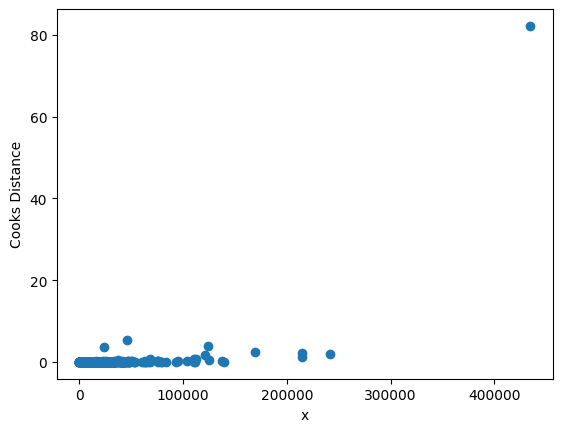

In [25]:
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#Determinación del punto de corte:
pto_cook = 4/len(X_train)
pto_cook

0.0015923566878980893

In [40]:
#Determinar qué filas se encuentran fuera de la distribución del resto de punto (inlfuyentes)
np.where(cooks_distance[0]>80)[0]

array([2285])

In [41]:
# Casos que se consideran observaciones influyentes
casos_influyentes = np.where(cooks_distance[0]>pto_cook)[0]
print(f'Porcentaje de casos a desestimar: {len(casos_influyentes)/len(df)*100}%')

Porcentaje de casos a desestimar: 5.35031847133758%


In [29]:
#Eliminamos del X_train y y_train aquellas que consideramos influyentes sobre el estudio:

X_train1 = X_train.loc[~X_train.index.isin(X_train.index[casos_influyentes]),:]
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[casos_influyentes])]

### Evaluación de Importancia de las variables basado en árboles

In [43]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

# Creamos un df de importancias de características
dict_data = {'Feature':X_train1.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)

# Ordenar descendentemente por importancia
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

# Variables cuya importancia es mayor o igual a un 1%
df_imp[df_imp['Importancia']>=1]

,Feature,Importancia
38,Population Aged 60+,61.709076
37,ICU Beds_x,16.482111
7,60-69,12.947796
12,Native American/American Indian-alone pop,3.964262
8,70-79,2.301073


## **Observaciones**
Las variables que tienen mayor importancia sobre el modelo y la predicción del número de personas con enfermedades cardíacas es la e población mayor a 60 años, seguido de la disponibilidad de camas de cuidados intensivos, así como ser nativo americano. Podría tener sentido dada la enfermedad con la que queremos trabajar.

### Análisis de correlación de todas nuestras variables (HeatMap)

<Axes: >

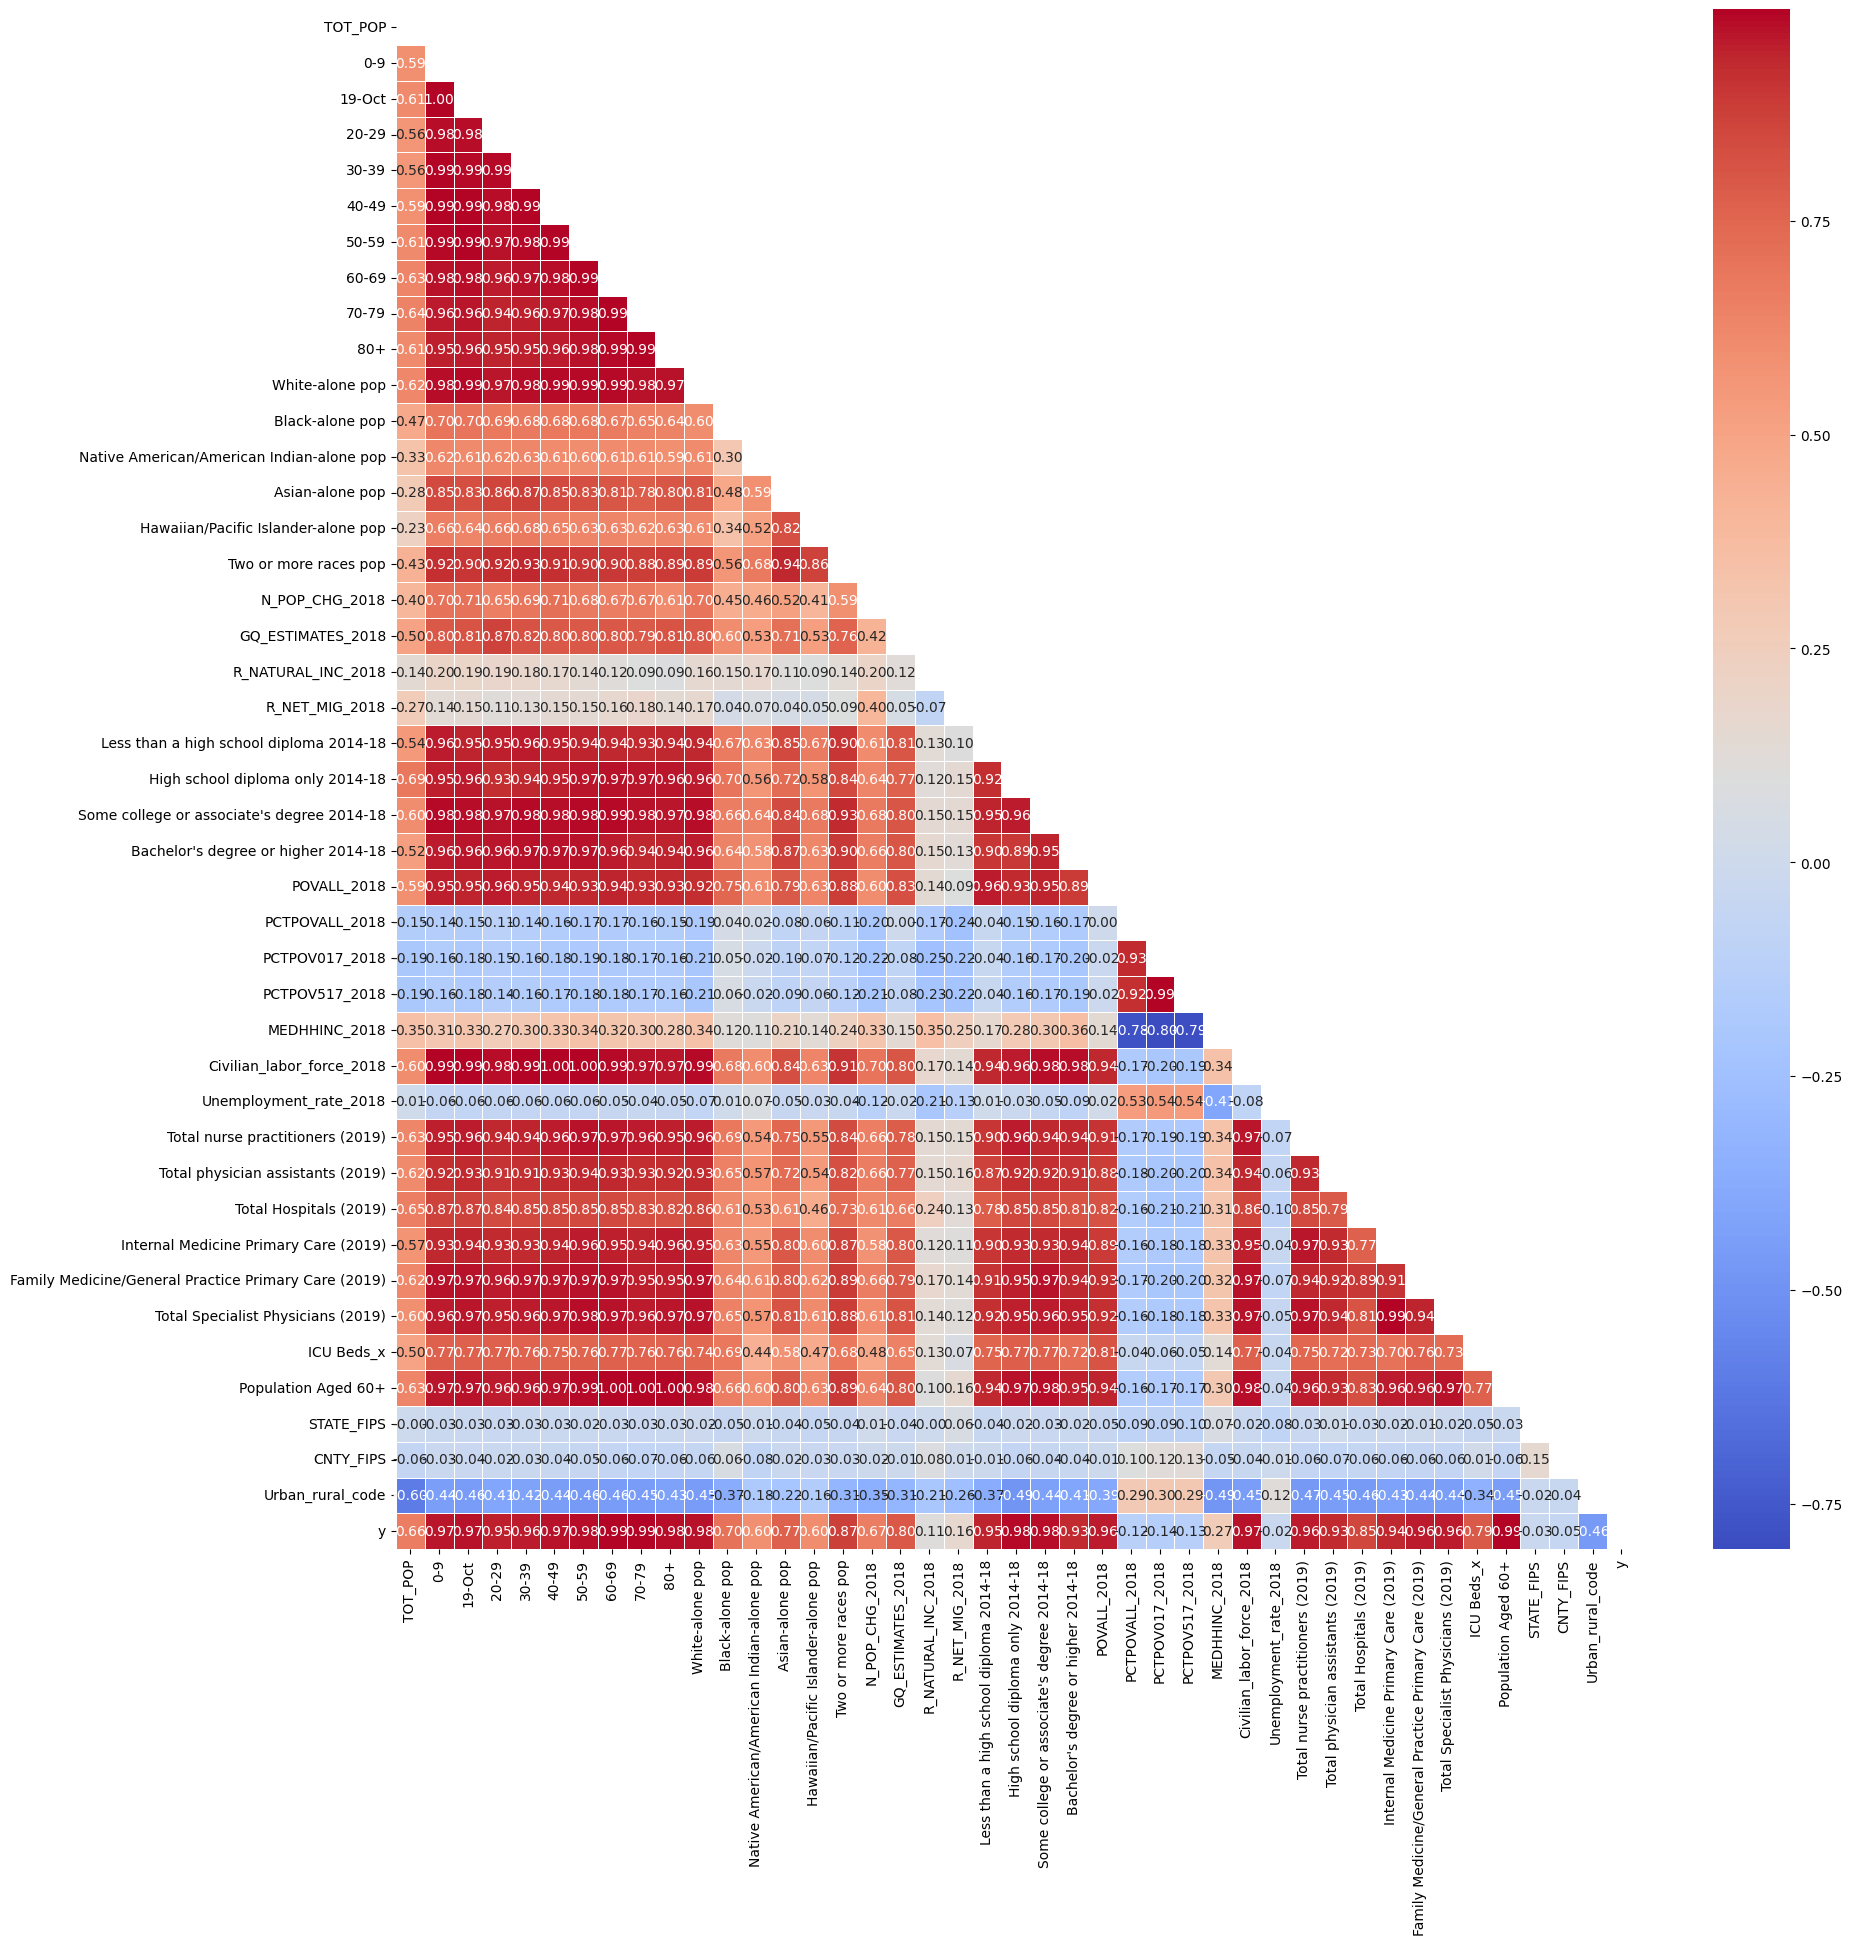

In [31]:
#Evaluación de correlaciones entre características
X_corr = X_train1.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()

#Ocultamos la mitad de la matriz para no ver los valores duplicados
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

## **Observaciones**
Por mucho que pueda eliminar variables, considero que los grupos etarios (rangos de edades) y niveles de estudio son relevantes para el estudio, sin embargo, como hemos visto que la edad +60 es la de mayor importancia y sus niveles de correlación son muy alto (típico de esperarse, aunque no evidente), eliminaré el resto de grupos de edades para quedarme con las que considero que puedan predecir mejor mi variable objetivo. Por otra parte, no entendería muy bien la correlación existente de la disponibilidad de los distintos personales de salud con los grupos de edades, no esperaría eliminarlos a pesar de su alto nivel de correlación. Asimismo, dado su alto nivel de correlación de 'two or more races' con el resto de variables, también la eliminaré para evitar redundancias. 

In [32]:
# Population Aged 60+, two or more races pop a eliminar por alta correlación con grupos raciales y otros rangos de edad.

X_train2 = X_train1.drop(columns=['0-9', '19-Oct', '20-29', '30-39','40-49','50-59','60-69','70-79','80+', 'Two or more races pop'], axis = 1)
X_test2 = X_test.drop(columns=['0-9', '19-Oct', '20-29', '30-39','40-49','50-59','60-69','70-79','80+','Two or more races pop'], axis = 1)

<Axes: >

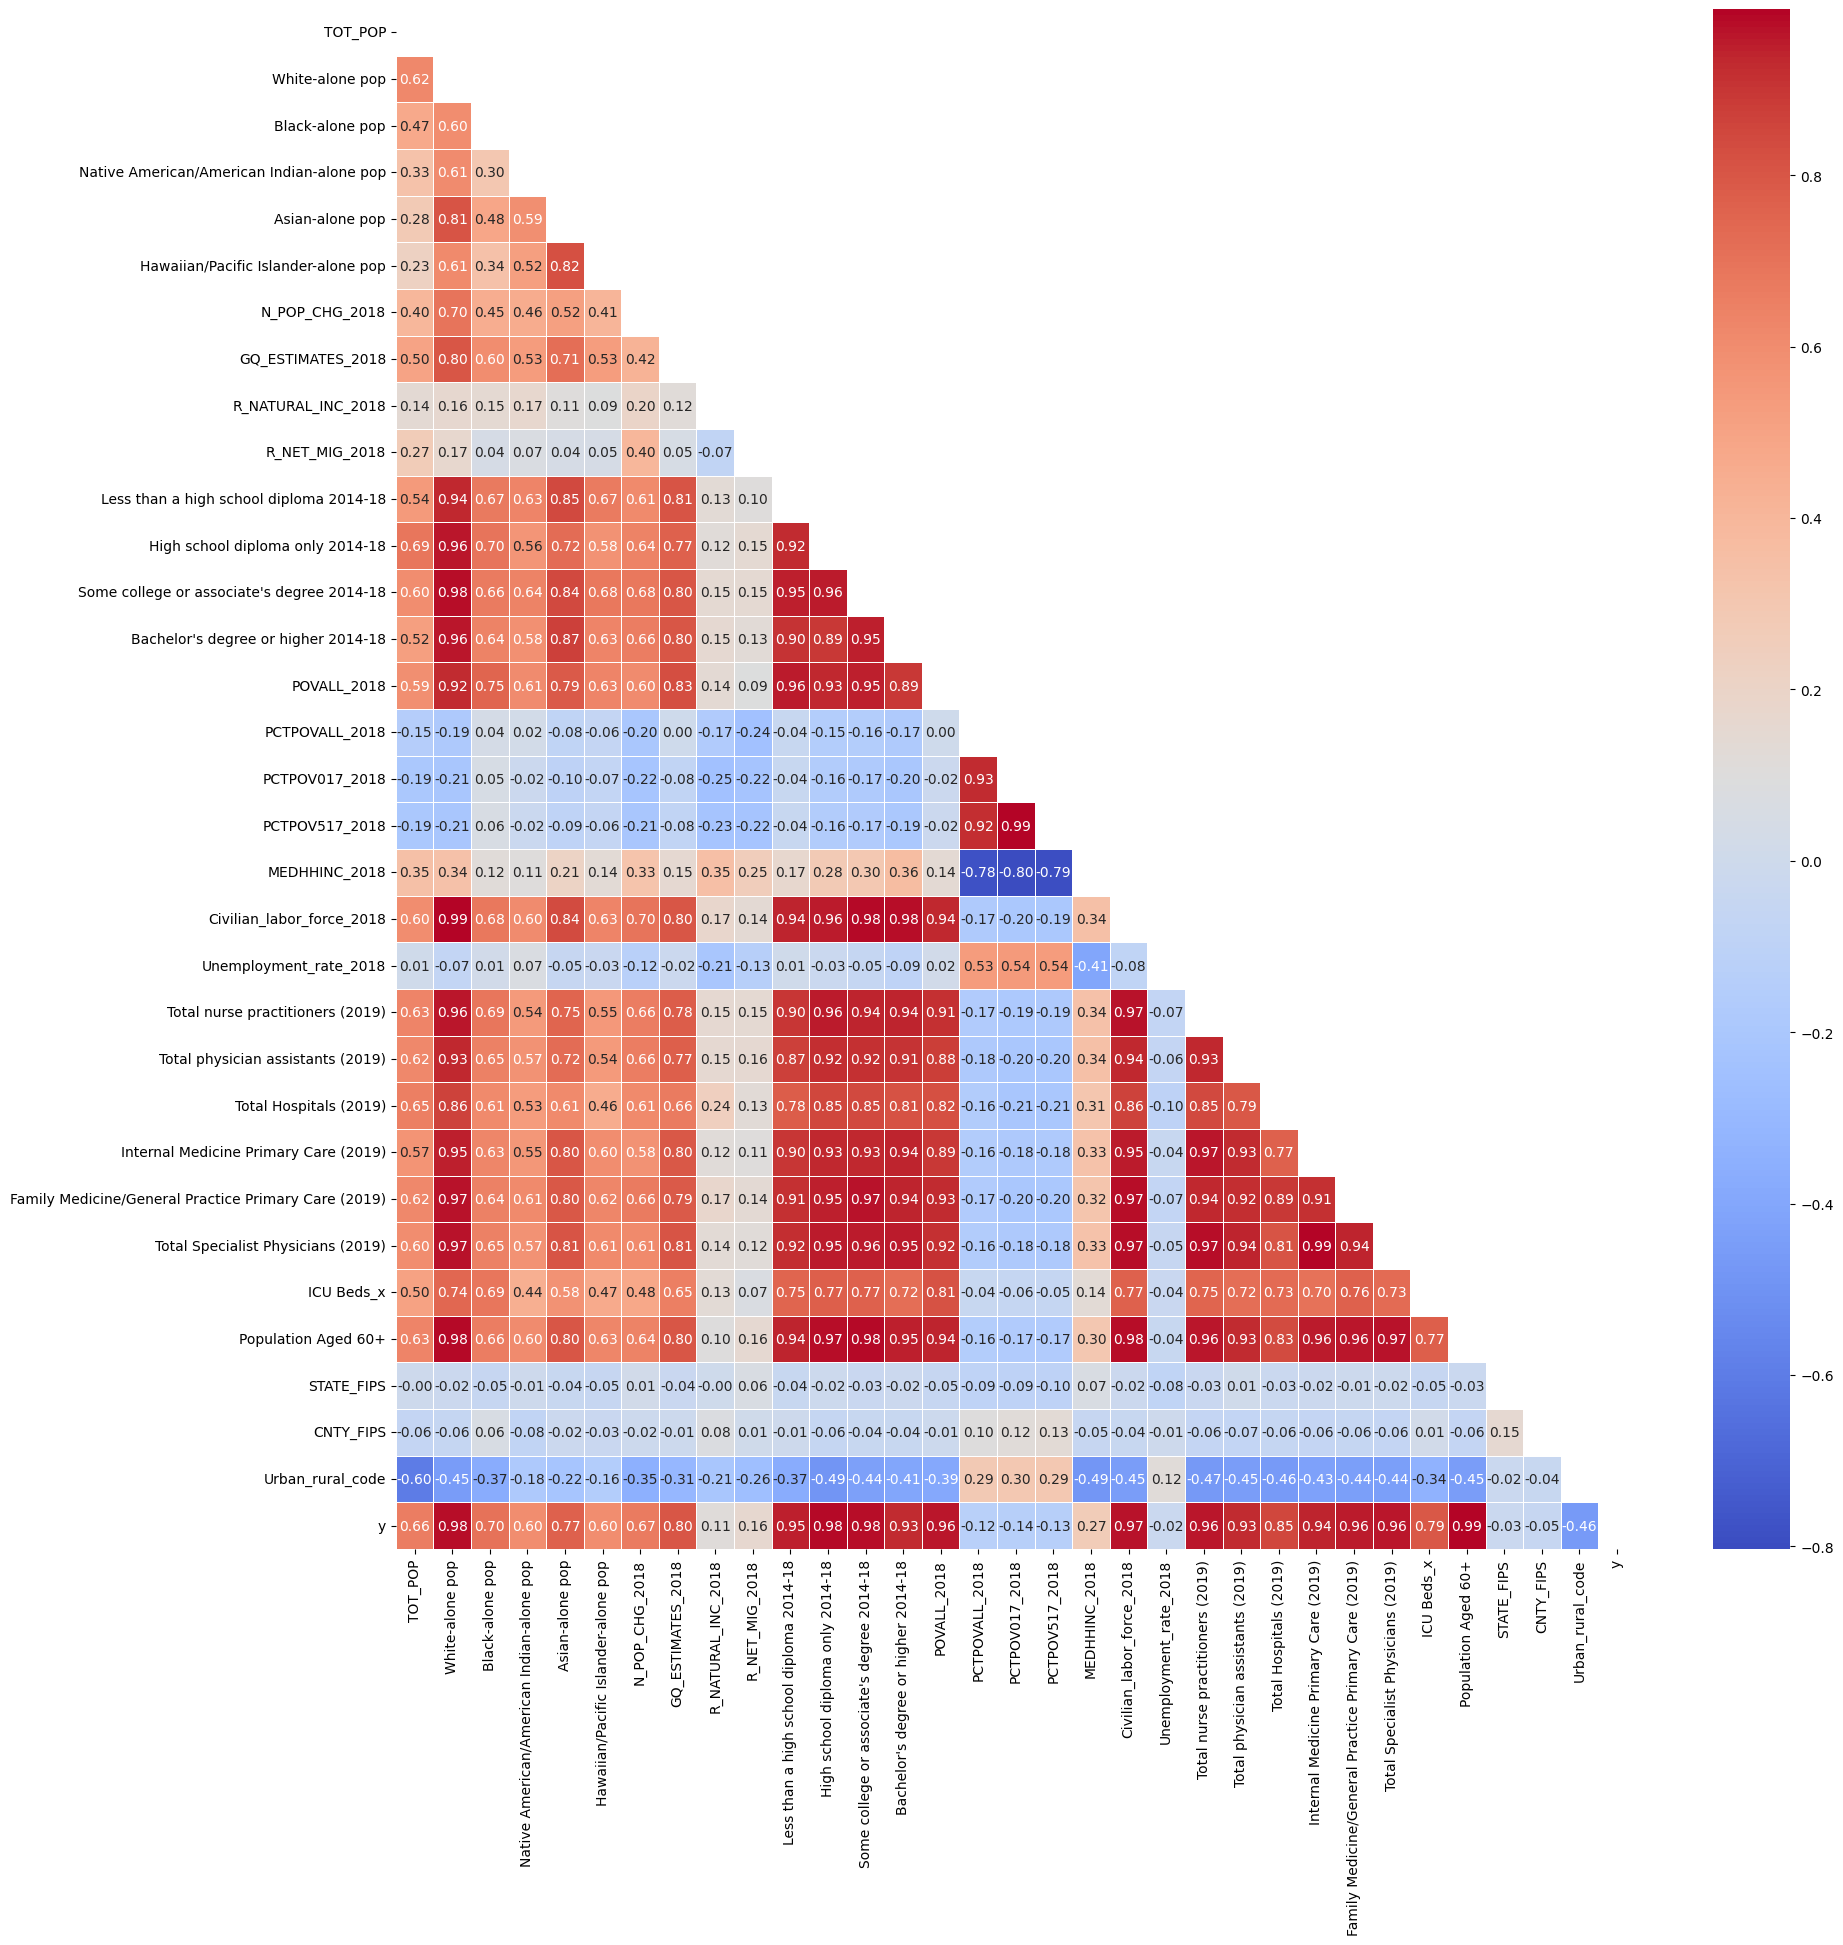

In [ ]:
#Evaluación de correlaciones entre características después de eliminar otras columnas
X_corr = X_train2.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()

#Ocultamos la mitad de la matriz para no ver los valores duplicados
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

## **Evaluación de importancia**

In [33]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train2, y_train1)

# Creamos un df de importancias de características
dict_data = {'Feature':X_train2.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)

# Ordenar descendentemente por importancia
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

# Variables cuya importancia es mayor o igual a un 1%
df_imp[df_imp['Importancia']>=1]

,Feature,Importancia
28,Population Aged 60+,55.464180
27,ICU Beds_x,34.735905
3,Native American/American Indian-alone pop,4.532474
0,TOT_POP,1.922052
11,High school diploma only 2014-18,1.791959


### Escalado de variables. Método: StandarScaler

In [34]:
# Utilización de método escalador 
scaler = StandardScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train2), columns=X_train2.columns, index=X_train2.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test2), columns=X_test2.columns, index=X_test2.index)

### VIF - Variance Inflation Factor

In [35]:
# Medir colinealidad de las variables para el modelo predictivo de regresión (Variance Inflation Factor)
vif = pd.Series([variance_inflation_factor(X_train2.corr().values, i) for i in range(X_train2.corr().shape[1])], index=X_train2.columns)
vif

TOT_POP                                                 1.483953e+03
White-alone pop                                         4.099576e+07
Black-alone pop                                         7.954842e+05
Native American/American Indian-alone pop               1.407035e+04
Asian-alone pop                                         5.532229e+05
Hawaiian/Pacific Islander-alone pop                     1.482798e+04
N_POP_CHG_2018                                          3.461995e+04
GQ_ESTIMATES_2018                                       1.315711e+04
R_NATURAL_INC_2018                                      2.197436e+02
R_NET_MIG_2018                                          3.799689e+01
Less than a high school diploma 2014-18                 7.559525e+05
High school diploma only 2014-18                        2.683447e+06
Some college or associate's degree 2014-18              5.289560e+06
Bachelor's degree or higher 2014-18                     6.683643e+06
POVALL_2018                       

## **Observaciones**
Con estos niveles tan altos de VIF, es muy probable que exista altos niveles de colinealidad y haya que ser o más rigurosos con el EDA y eliminación de variables relacionadas entre sí, o revisar los escalados o probar un sistema de regularización.

### **Entrenamiento del Modelo de Regresión**

In [36]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train1)
y_pred = lr.predict(X_test_sc)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE test - error cuadrático medio (raíz): {rmse:.3f}")
print(f"R2 test - coeficiente de determinación: {r2_score(y_test, y_pred):.3f}")


RMSE test - error cuadrático medio (raíz): 743.190
R2 test - coeficiente de determinación: 0.994


## **Observaciones**
Dado que el RMSE (la raíz del cuadrado medio del error), va entorno a unos 743 personas, siendo un valor muy por debajo de la desviación típica obtenida de nuestra variable objetivo 'heart_disease_prevalence' que va en los 15615, me atrevería a decir que el modelo está bastante ajustado. Cosa que confirma el coeficiente de determinación, cuyo valor esta sobre el 99%, lo cual explica casi toda la variabilidad existente en nuestro modelo. Tiene una muy alta capacidad predictiva sobre la condición de estudio : número de personas con enfermedades cardíacas. 

No obstante, recordando que existen muchísimas variables correlacionadas entre sí, sin haberse extraído del estudio, podría estarse revisando un caso de variabilidad y posibles errores de interpretación de algunos coeficientes. Intentaremos utilizar un método de regularización para reducir posibles errores dado los altos niveles de colinealidad existentes. 

In [44]:
## Modelo de regresión con todos los coeficientes por variable predictiva. 
X2 = sm.add_constant(X_train_sc)  # Intercepto
model = sm.OLS(y_train1, X2).fit()
print(model.summary()) 

                             OLS Regression Results                             
Dep. Variable:     Heart disease_number   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 3.003e+04
Date:                  Mon, 16 Jun 2025   Prob (F-statistic):               0.00
Time:                          18:07:45   Log-Likelihood:                -16374.
No. Observations:                  2344   AIC:                         3.281e+04
Df Residuals:                      2311   BIC:                         3.300e+04
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### Método de Regularización Lasso

In [38]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_sc, y_train1)
y_pred_lasso = lasso.predict(X_test_sc)
print(f"Lasso R2 test: {r2_score(y_test, y_pred_lasso):.3f}")

Lasso R2 test: 0.994


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.744e+07, tolerance: 6.683e+06
  model = cd_fast.enet_coordinate_descent(


## **Observaciones**
Las aproximaciones de R2 no son muy diferentes a las obtenidas inicialmente, sin embargo, buscaremos los mejores valores del hiperparámetro alpha sobre los cuales podremos obtener el modelo optimizado sobre los datos de test (predicciones). 

### Iterar el modelo añadiendo valores de alpha entre 0 y 20. Graficamos resultados obtenidos de R2

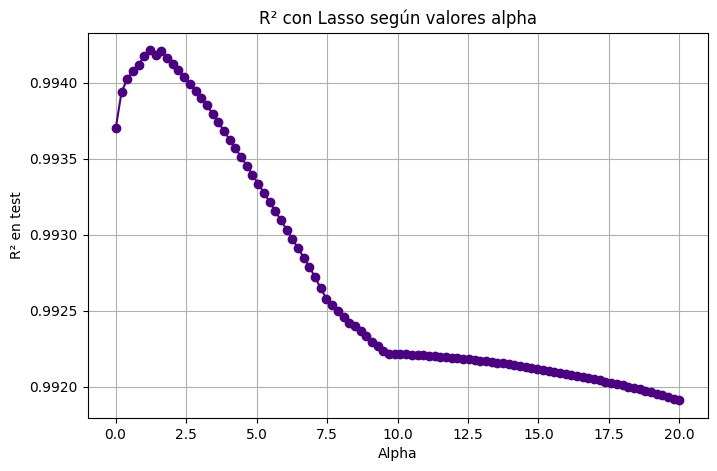

In [45]:
alphas = np.linspace(0.01, 20, 100)  # 100 valores entre 0 y 20
r2_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_sc, y_train1)
    y_pred = model.predict(X_test_sc)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(alphas, r2_scores, color = 'indigo', marker='o')
plt.title('R² con Lasso según valores alpha')
plt.xlabel('Alpha')
plt.ylabel('R² en test')
plt.grid(True)
plt.show()

## **Observaciones**
Tomando valores entre 0 y 20 de alpha como hiperparámetro del método de Lasso, vemos que el valor de alpha con el que obtenemos el mejor rendimiento o ajuste es con alpha = 2 aproximadamente (mejores valores entre 0 y 2). 

### **Método de regularización con el alpha óptimo**

In [ ]:
lasso = Lasso(alpha=2)
lasso.fit(X_train_sc, y_train1)
y_pred_lasso = lasso.predict(X_test_sc)
print(f"Lasso R2 test: {r2_score(y_test, y_pred_lasso):.3f}")

Lasso R2 test: 0.994


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.353e+07, tolerance: 6.683e+06
  model = cd_fast.enet_coordinate_descent(


### **Observaciones**
No tiene sentido que sin aplicar el método de Lasso, el R2 sea de 0,998 y con el Lasso buscando el parámetro alpha óptimo resulte incluso un rendimiento menor. 